# Support Vector Machines (SVMs)

Code by <b>Michael Shaham</b> for Northeastern's EECE5644 - Introduction to Machine Learning & Pattern Recognition course.

In [1]:
import copy
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

## Least squares classification

Line 1:  
$$x_2 = 2x_1 - 2 \implies x_1 - x_2 = 2 \implies w_1^T x = b_1,\ w_1 = (2, -1),\ b_1 = 2$$

Line 2:  
$$x_2 = 2x_1 - 6 \implies x_1 - x_2 = 6 \implies w_2^T x = b_2,\ w_2 = (2, -1),\ b_2 = 6$$

Ideal separator:  
$$w^T x = b,\ w = (2, -1),\ b = 4$$

### The data

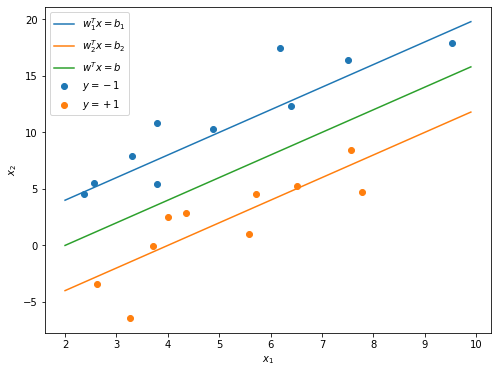

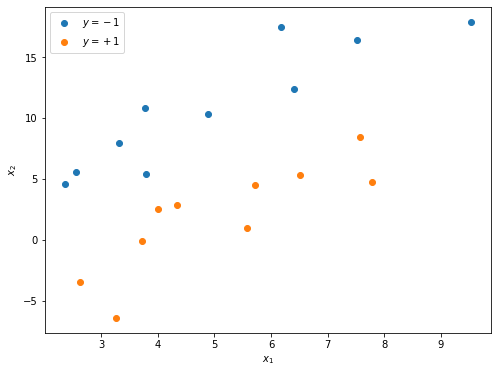

In [2]:
np.random.seed(16)

# we'll generate data from the two lines given above

x_1_range = np.arange(2, 10, .1)
x_2_l1 = 2*x_1_range
x_2_l2 = 2*x_1_range - 8
x_2_sep = 2*x_1_range - 4

plt.figure(figsize=(8, 6))
plt.plot(x_1_range, x_2_l1, label=r"$w_1^Tx = b_1$")
plt.plot(x_1_range, x_2_l2, label=r"$w_2^Tx = b_2$")
plt.plot(x_1_range, x_2_sep, label=r"$w^Tx = b$")

# generate some data points from each line with noise

m_1 = 10
m_2 = 10
m = m_1 + m_2
# first m_1 data points belong to line 1 (y = -1), rest to line 2 (y = +1)
x_1_data = 2 + 8*np.random.rand(m)
x_2_data = np.r_[2*x_1_data[:m_1] + 2*np.random.randn(m_1), 
                 2*x_1_data[m_1:] - 8 + 2*np.random.randn(m_2)]
y_data = np.r_[-1*np.ones(m_1), np.ones(m_2)]

plt.scatter(x_1_data[:m_1], x_2_data[:m_1], label=r"$y=-1$")
plt.scatter(x_1_data[m_1:], x_2_data[m_1:], label=r"$y=+1$")
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

#plt.savefig("figures/svm_2d_toy_data.png", bbox_inches='tight')
plt.show();

plt.figure(figsize=(8, 6))
plt.scatter(x_1_data[:m_1], x_2_data[:m_1], label=r"$y=-1$")
plt.scatter(x_1_data[m_1:], x_2_data[m_1:], label=r"$y=+1$")
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
#plt.savefig("figures/svm_raw_2d_data.png", bbox_inches='tight')
plt.show();

### Case 1: no outliers

FileNotFoundError: [Errno 2] No such file or directory: 'figures/svm_2d_opt_no_outliers.png'

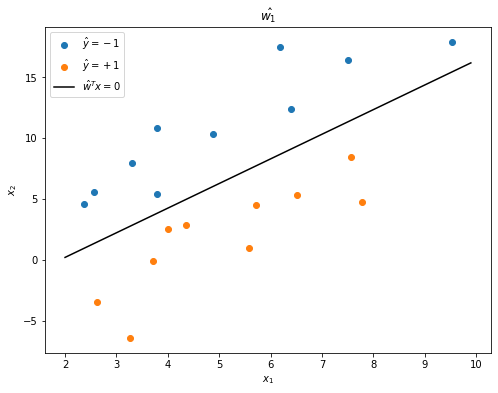

In [3]:
# create data matrices/vectors
X = np.c_[x_1_data, x_2_data, np.ones(m)]
y = copy.deepcopy(y_data)

# find least squares classifier
w_no_out = np.linalg.inv(X.T @ X) @ X.T @ y

# make predictions:
y_hat = np.sign(X @ w_no_out)
l1_inds = y_hat == -1
l2_inds = y_hat == 1

plt.figure(figsize=(8, 6))

# plot data and predictions
plt.scatter(X[l1_inds, 0], X[l1_inds, 1], label=r"$\hat{y} = -1$")
plt.scatter(X[l2_inds, 0], X[l2_inds, 1], label=r"$\hat{y} = +1$")

# plot optimal decision boundary
w_1, w_2, w_0 = w_no_out
x_1_opt = copy.deepcopy(x_1_range)
x_2_no_out = (-w_0 - w_1*x_1_opt) / w_2
plt.plot(x_1_opt, x_2_no_out, 'k-', label=r"$\hat{w}^T x = 0$")

plt.title(r"$\hat{w_1}} = (%.2f, %.2f),\ \hat{w_0} = %.2f$" % (w_1, w_2, w_0))
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

#plt.savefig("figures/svm_2d_opt_no_outliers.png", bbox_inches='tight')
plt.show();

### Case 2: outliers

In [ ]:
# add an outlier data point to data with label +1
X_out = np.r_[X, np.array([[10, -20, 1]])]
y = np.r_[y, 1]
m = len(y)

plt.figure(figsize=(8, 6))

# find least squares classifier
w_out = np.linalg.inv(X_out.T @ X_out) @ X_out.T @ y

# make predictions:
y_hat = np.sign(X_out @ w_out)
correct_inds = y_hat == y
incorrect_inds = correct_inds == False
l1_preds = y_hat == -1
l2_preds = y_hat == 1

# plot data and predictions
plt.scatter(X_out[correct_inds, 0][:m_1], X_out[correct_inds, 1][:m_1], label=r"$\hat{y} = -1$")
plt.scatter(X_out[correct_inds, 0][m_1:], X_out[correct_inds, 1][m_1:], label=r"$\hat{y} = +1$")
plt.scatter(X_out[incorrect_inds, 0], X_out[incorrect_inds, 1], c='red', label="misclassified")

# plot optimal decision boundary
w_1, w_2, w_0 = w_out
x_1_opt = copy.deepcopy(x_1_range)
x_2_out = (-w_0 - w_1*x_1_opt) / w_2
plt.plot(x_1_opt, x_2_out, 'k-', label=r"$\hat{w}^T x = 0$")

plt.title(r"$\hat{w} = (%.2f, %.2f),\ \hat{w_0} = %.2f$" % (w_1, w_2, w_0))
plt.legend(loc="lower left")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

#plt.savefig("figures/svm_2d_opt_outliers.png", bbox_inches='tight')
plt.show();

## The basic SVM: minimization using the hinge loss

In [ ]:
# set up cvx opt problem
n = X_out.shape[1]
w_hinge = cp.Variable((n, 1))
loss = cp.sum(cp.pos(1 - cp.multiply(y, (X_out @ w_hinge).flatten())))
prob = cp.Problem(cp.Minimize(loss))
prob.solve()

w_1, w_2, w_0 = w_hinge.value
x_2_hinge = (-w_0 - w_1*x_1_range) / w_2

plt.figure(figsize=(8, 6))
plt.scatter(X_out[:m_1, 0], X_out[:m_1, 1], label=r"$y=-1$")
plt.scatter(X_out[m_1:, 0], X_out[m_1:, 1], label=r"$y=+1$")
plt.plot(x_1_range, x_2_hinge, 'k-', label="hinge dec boundary")
plt.plot(x_1_opt, x_2_out, 'b-', label="ls dec boundary")

plt.title(r"$\hat{w} = (%.2f, %.2f),\ \hat{w_0} = %.2f$" % (w_1, w_2, w_0))
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

#plt.savefig("figures/svm_2d_hinge_comp.png", bbox_inches='tight')
plt.show();

## Maximum margin classification

In [ ]:
# set up cvx opt problem
w_mm = cp.Variable((n, 1))
loss = cp.norm2(w_mm[:2])**2
constraints = [1 - cp.multiply(y, (X_out @ w_mm).flatten()) <= 0]
prob = cp.Problem(cp.Minimize(loss), constraints)
prob.solve()

w_1, w_2, w_0 = w_mm.value
x_2_mm = (-w_0 - w_1*x_1_range) / w_2

plt.figure(figsize=(8, 6))
plt.scatter(X_out[:m_1, 0], X_out[:m_1, 1], label=r"$y=-1$")
plt.scatter(X_out[m_1:, 0], X_out[m_1:, 1], label=r"$y=+1$")
plt.plot(x_1_range, x_2_mm, 'k-', label="max margin dec boundary")
plt.plot(x_1_range, x_2_hinge, 'g-', label="hinge dec boundary")
# plt.plot(x_1_opt, x_2_out, 'b-', label="ls dec boundary")

plt.title(r"$\hat{w} = (%.2f, %.2f),\ \hat{w_0} = %.2f$" % (w_1, w_2, w_0))
plt.legend(loc='lower left')
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

#plt.savefig("figures/svm_2d_max_margin.png", bbox_inches='tight')
plt.show();

## The support vector machine